In [1]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/mssmartypants/rice-type-classification")

Skipping, found downloaded files in ".\rice-type-classification" (use force=True to force download)


In [37]:
import torch    
import torch.nn as nn #nn stands for neural network
from torch.optim import Adam
from torch.utils.data import DataLoader, Dataset 
from torchsummary import summary
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [3]:
data_df = pd.read_csv(r"rice-type-classification\riceClassification.csv")
data_df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [4]:
data_df.dropna(inplace=True)
data_df.drop(columns=['id'], axis=1, inplace=True)
print(data_df.shape)

(18185, 11)


In [5]:
data_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [6]:
print(data_df['Class'].unique())

[1 0]


In [7]:
print(data_df['Class'].value_counts())

Class
1    9985
0    8200
Name: count, dtype: int64


In [8]:
original_df = data_df.copy()
for col in data_df.columns:
    data_df[col] = data_df[col]/data_df[col].abs().max()

data_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,0.444368,0.503404,0.775435,0.744658,0.424873,0.666610,0.741661,0.537029,0.844997,0.368316,1.0
1,0.281293,0.407681,0.622653,0.750489,0.273892,0.530370,0.804230,0.409661,0.919215,0.371471,1.0
2,0.298531,0.416421,0.630442,0.756341,0.284520,0.546380,0.856278,0.412994,0.959862,0.374747,1.0
3,0.300979,0.420463,0.629049,0.764024,0.286791,0.548616,0.883772,0.414262,0.961818,0.379222,1.0
4,0.361704,0.464626,0.682901,0.775033,0.345385,0.601418,0.867808,0.452954,0.966836,0.386007,1.0


In [9]:
X = np.array(data_df.iloc[:,:-1])
Y= np.array(data_df.iloc[:,-1])

In [10]:
X_train , X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3)

In [11]:
X_test , X_val, Y_test, Y_val = train_test_split(X_test,Y_test, test_size = 0.5)

In [12]:
X_train.shape, X_test.shape, X_val.shape

((12729, 10), (2728, 10), (2728, 10))

In [13]:
class dataset(Dataset):
    def __init__(self, X, Y):
        self.X = torch.tensor(X, dtype = torch.float32).to(device)
        self.Y = torch.tensor(Y, dtype = torch.float32).to(device)
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, index):
        return self.X[index], self.Y[index]

In [14]:
training_data = dataset(X_train, Y_train)
validation_data = dataset(X_val, Y_val)
testing_data = dataset(X_test, Y_test)

In [22]:
train_dataloader = DataLoader(training_data, batch_size=32, shuffle = True)
test_dataloader = DataLoader(testing_data, batch_size=32, shuffle = False)
val_dataloader = DataLoader(validation_data, batch_size=32, shuffle = False)

In [23]:
for x,y in train_dataloader:
    print(x)
    print(y)
    break

tensor([[0.5453, 0.7687, 0.6190, 0.9639, 0.5249, 0.7385, 0.7683, 0.6307, 0.7519,
         0.7046],
        [0.5375, 0.8296, 0.5629, 0.9848, 0.5130, 0.7332, 0.5981, 0.6524, 0.6926,
         0.8361],
        [0.7938, 0.8241, 0.8379, 0.9194, 0.7555, 0.8910, 0.6596, 0.7096, 0.8645,
         0.5580],
        [0.6029, 0.8242, 0.6441, 0.9681, 0.5730, 0.7765, 0.7317, 0.6705, 0.7355,
         0.7260],
        [0.9211, 0.9066, 0.8855, 0.9288, 0.8804, 0.9597, 0.6375, 0.7780, 0.8345,
         0.5809],
        [0.8833, 0.8755, 0.8805, 0.9221, 0.8545, 0.9399, 0.8150, 0.7728, 0.8111,
         0.5642],
        [0.9111, 0.8794, 0.9013, 0.9175, 0.8666, 0.9545, 0.7536, 0.7707, 0.8412,
         0.5535],
        [0.6331, 0.7374, 0.7514, 0.9189, 0.6019, 0.7957, 0.6563, 0.6470, 0.8294,
         0.5568],
        [0.8830, 0.8630, 0.8909, 0.9157, 0.8499, 0.9397, 0.6755, 0.7707, 0.8153,
         0.5496],
        [0.7510, 0.8088, 0.8128, 0.9222, 0.7208, 0.8666, 0.6442, 0.7015, 0.8369,
         0.5645],
        [0

In [24]:
HIDDEN_NEURONS = 16
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        
        self.input_layer = nn.Linear(X.shape[1], HIDDEN_NEURONS)
        self.linear = nn.Linear(HIDDEN_NEURONS, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.input_layer(x)
        x = self.linear(x)
        x = self.sigmoid(x)
        return x

model = MyModel().to(device)

In [25]:
summary(model, (X.shape[1],))

Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 16]                  176
├─Linear: 1-2                            [-1, 1]                   17
├─Sigmoid: 1-3                           [-1, 1]                   --
Total params: 193
Trainable params: 193
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00


Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 16]                  176
├─Linear: 1-2                            [-1, 1]                   17
├─Sigmoid: 1-3                           [-1, 1]                   --
Total params: 193
Trainable params: 193
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [26]:
criterion = nn.BCELoss()
optimizer = Adam(model.parameters(), lr = 1e-3)

In [27]:
total_loss_train_plot = []
total_loss_validation_plot = []
total_acc_train_plot=[]
total_acc_validation_plot=[]

epochs = 10
for epoch in range(epochs):
    total_acc_train = 0
    total_loss_train = 0 
    total_acc_val= 0 
    total_loss_val = 0
    
    for data in train_dataloader:
        inputs, labels = data
        prediction = model(inputs).squeeze(1)
        batch_loss = criterion(prediction, labels)
        total_loss_train += batch_loss.item()
        acc = ((prediction).round() == labels).sum().item()
        total_acc_train += acc
        batch_loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    
    with torch.no_grad():
        for data in val_dataloader:
            inputs, labels = data
            prediction = model(inputs).squeeze(1)
            batch_loss = criterion(prediction, labels)
            total_loss_val += batch_loss.item()
            acc = ((prediction).round() == labels).sum().item()
            total_acc_val += acc

    total_loss_train_plot.append(round(total_loss_train/1000,4))
    total_loss_validation_plot.append(round(total_loss_val/1000,4))
    total_acc_train_plot.append(round(total_acc_train/training_data.__len__() * 100,4))
    total_acc_validation_plot.append(round(total_acc_val/validation_data.__len__()*100,4))
    print(f"""Epoch no: {epoch+1}, Train Loss: {round(total_loss_train/1000,4)}, Train ACC: {round(total_acc_train/training_data.__len__()*100,4)} 
    Validation Loss: {round(total_loss_val/1000,4)}, Validation ACC: {round(total_acc_val/validation_data.__len__()*100,4)}""")
    print("="*25)

Epoch no: 1, Train Loss: 0.2338, Train ACC: 85.5605 
    Validation Loss: 0.0355, Validation ACC: 95.5645
Epoch no: 2, Train Loss: 0.102, Train ACC: 98.0988 
    Validation Loss: 0.0131, Validation ACC: 98.2405
Epoch no: 3, Train Loss: 0.0455, Train ACC: 98.4759 
    Validation Loss: 0.0075, Validation ACC: 98.3138
Epoch no: 4, Train Loss: 0.0299, Train ACC: 98.6016 
    Validation Loss: 0.0056, Validation ACC: 98.6437
Epoch no: 5, Train Loss: 0.0237, Train ACC: 98.6173 
    Validation Loss: 0.0047, Validation ACC: 98.5337
Epoch no: 6, Train Loss: 0.0207, Train ACC: 98.6802 
    Validation Loss: 0.0042, Validation ACC: 98.6437
Epoch no: 7, Train Loss: 0.0189, Train ACC: 98.7116 
    Validation Loss: 0.004, Validation ACC: 98.4971
Epoch no: 8, Train Loss: 0.0179, Train ACC: 98.6252 
    Validation Loss: 0.0038, Validation ACC: 98.5337
Epoch no: 9, Train Loss: 0.0172, Train ACC: 98.7509 
    Validation Loss: 0.004, Validation ACC: 98.4238
Epoch no: 10, Train Loss: 0.0167, Train ACC: 98.6

In [36]:
with torch.no_grad():
    total_loss_test = 0
    total_acc_test = 0
    for data in test_dataloader:
        inputs, labels = data 

        predictions = model(inputs).squeeze(1)
        batch_loss = criterion(predictions, labels)
        total_loss_test += batch_loss.item()
        acc = ((predictions).round() == labels).sum().item()
        total_acc_test += acc
        
print(f"Accuracy: {round(total_acc_test/testing_data.__len__()*100,4)}")

Accuracy: 98.3871


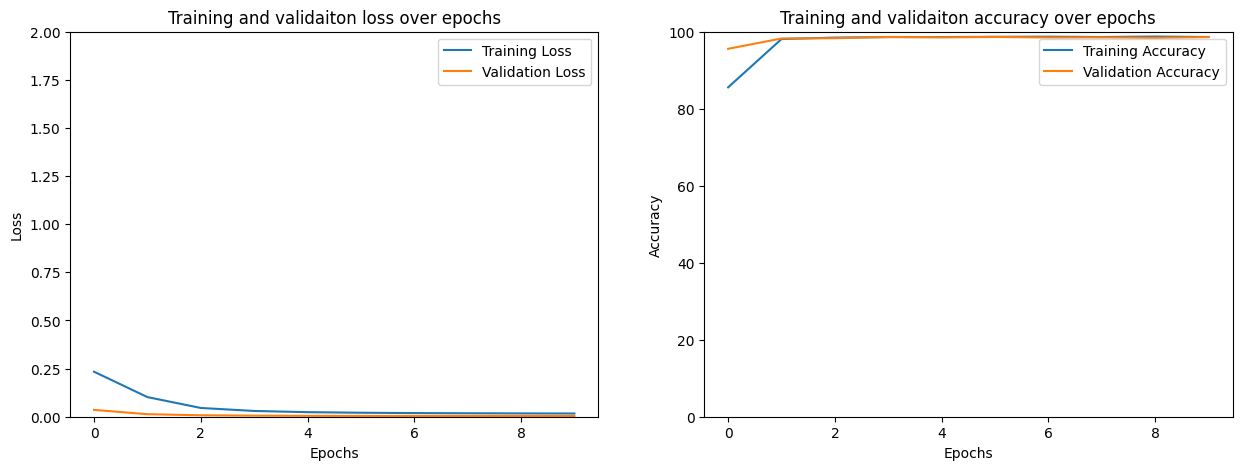

In [39]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize =(15,5))
axs[0].plot(total_loss_train_plot, label = "Training Loss")
axs[0].plot(total_loss_validation_plot, label = "Validation Loss")
axs[0].set_title("Training and validaiton loss over epochs")
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Loss")
axs[0].set_ylim([0,2])
axs[0].legend()

axs[1].plot(total_acc_train_plot, label = "Training Accuracy")
axs[1].plot(total_acc_validation_plot, label = "Validation Accuracy")
axs[1].set_title("Training and validaiton accuracy over epochs")
axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("Accuracy")
axs[1].set_ylim([0,100])
axs[1].legend()

plt.show()

In [41]:
area = float(input("Area: "))/original_df['Area'].abs().max()
MajorAxisLength = float(input("Major Axis Length: "))/original_df['MajorAxisLength'].abs().max()
MinorAxisLength = float(input("Minor Axis Length: "))/original_df['MinorAxisLength'].abs().max()
Eccentricity = float(input("Eccentricity: "))/original_df['Eccentricity'].abs().max()
ConvexArea = float(input("Convex Area: "))/original_df['ConvexArea'].abs().max()
EquivDiameter = float(input("EquivDiameter: "))/original_df['EquivDiameter'].abs().max()
Extent = float(input("Extent: "))/original_df['Extent'].abs().max()
Perimeter = float(input("Perimeter: "))/original_df['Perimeter'].abs().max()
Roundness = float(input("Roundness: "))/original_df['Roundness'].abs().max()
AspectRation = float(input("AspectRation: "))/original_df['AspectRation'].abs().max()
my_inputs = [area, MajorAxisLength, MinorAxisLength, Eccentricity, ConvexArea, EquivDiameter, Extent, Perimeter, Roundness, AspectRation]
print("="*20)
model_inputs = torch.Tensor(my_inputs).to(device)
prediction = (model(model_inputs))
print(prediction)
print("Class is: ", round(prediction.item()))

tensor([0.7217], device='cuda:0', grad_fn=<SigmoidBackward0>)
Class is:  1
